In [68]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2




In [17]:

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist


In [18]:

# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [19]:

# Normalize the data to have values between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis= 1)
xtest = tf.keras.utils.normalize(x_test, axis=1)


In [51]:
# Define the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))   
model.add(tf.keras.layers.Dense(128, activation='relu'))    
model.add(tf.keras.layers.Dense(10, activation='softmax'))    


/home/jamiroscreti/anaconda3/envs/Portfolio/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [53]:

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - accuracy: 0.8690 - loss: 0.4616
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0.1158
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9774 - loss: 0.0748
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0526
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9877 - loss: 0.0384
313/313 - 1s - 3ms/step - accuracy: 0.9626 - loss: 58.5826


In [54]:
print('\nTest Loss: {}\n'.format(test_loss))
print('\nTest Accuracy: {}\n'.format(test_acc))




Test Loss: 58.58256149291992


Test Accuracy: 0.9625999927520752



In [55]:
model.save("hadwritten_model.keras")


In [56]:
model = tf.keras.models.load_model("hadwritten_model.keras")


we now test the code


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
this digit is probably a 7


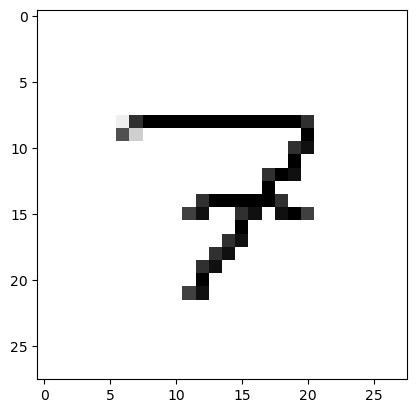

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
this digit is probably a 2


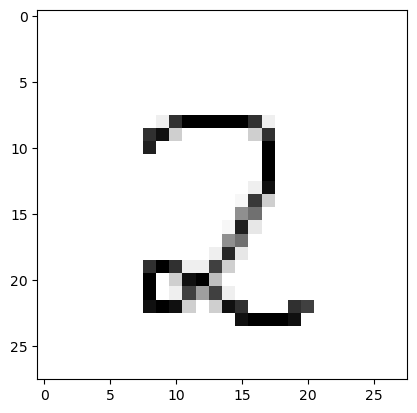

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
this digit is probably a 9


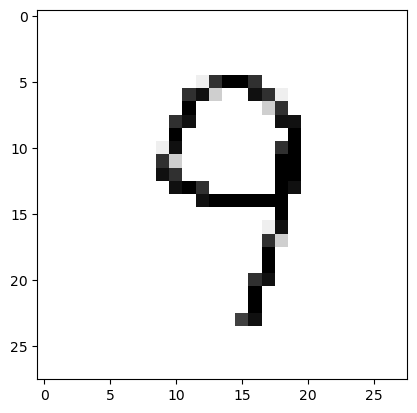

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
this digit is probably a 8


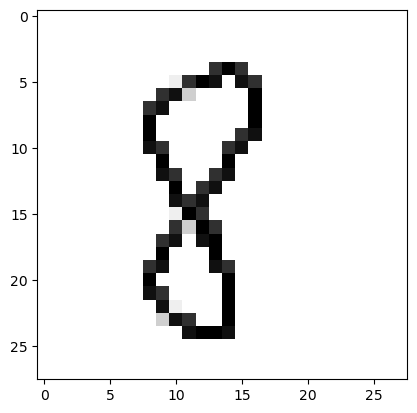

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
this digit is probably a 6


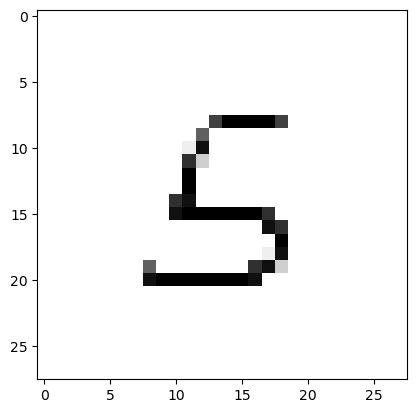

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
this digit is probably a 6


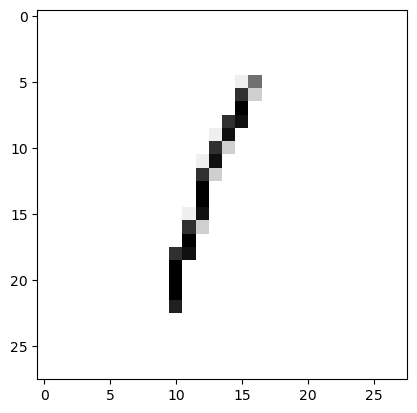

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
this digit is probably a 1


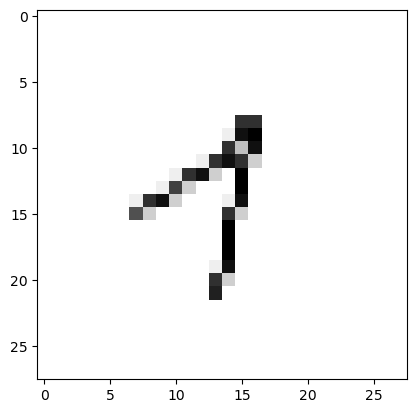

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
this digit is probably a 1


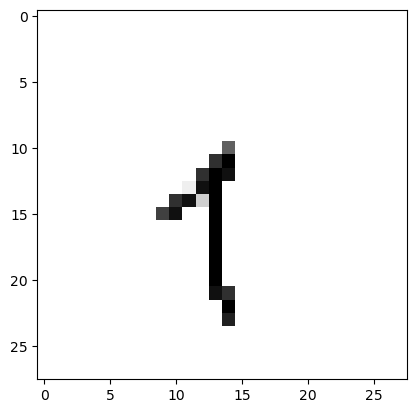

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
this digit is probably a 7


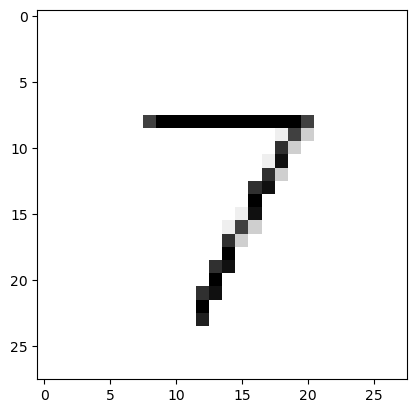

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
this digit is probably a 7


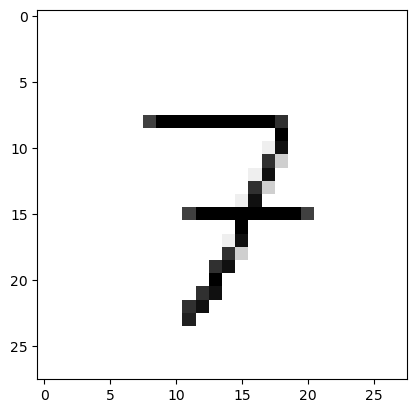

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
this digit is probably a 0


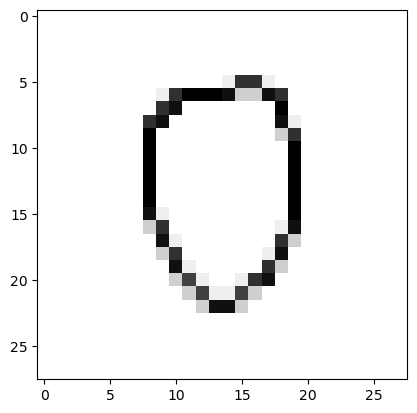

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
this digit is probably a 1


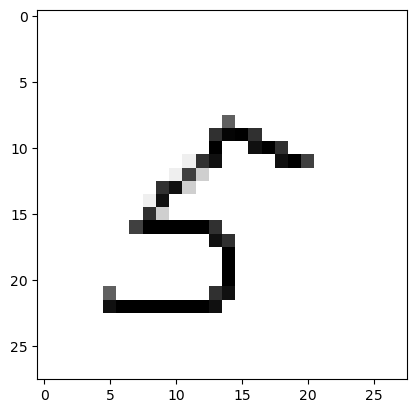

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
this digit is probably a 7


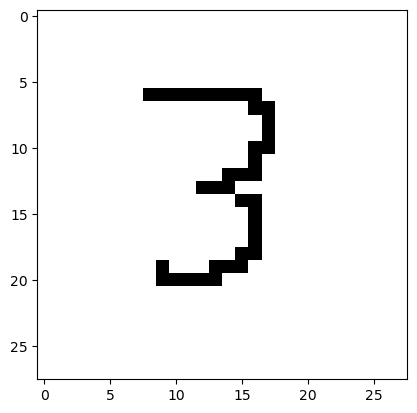

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
this digit is probably a 2


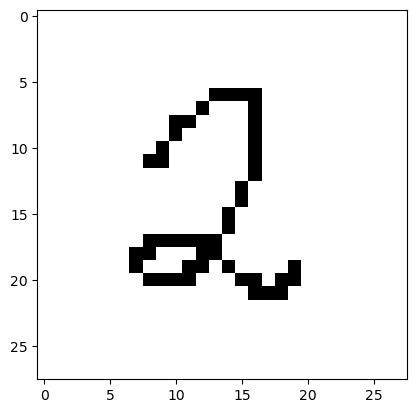

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
this digit is probably a 1


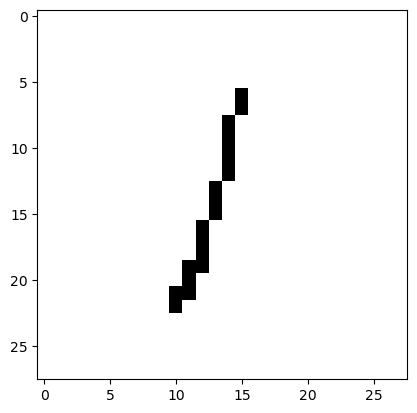

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
this digit is probably a 7


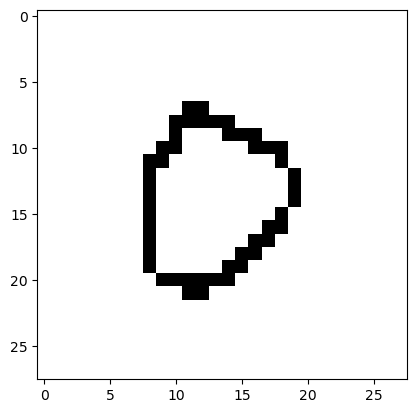

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
this digit is probably a 1


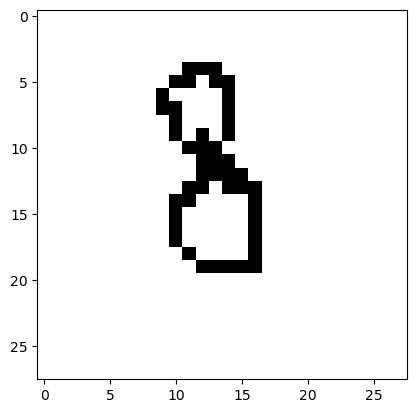

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
this digit is probably a 7


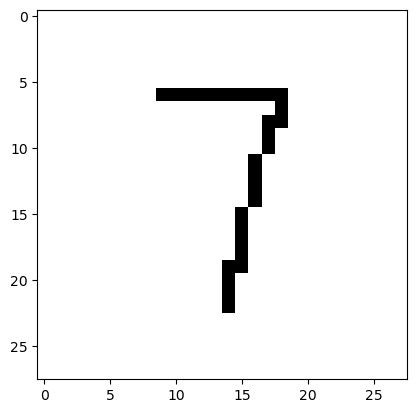

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
this digit is probably a 4


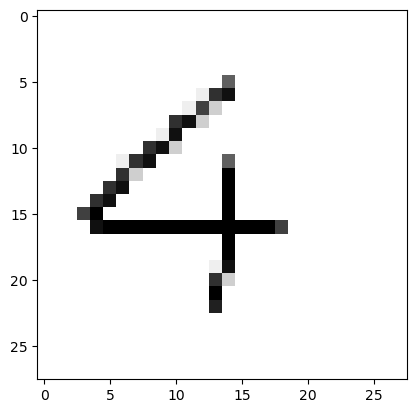

In [ ]:
image_index = 1
while os.path.isfile(f"digits/digit{image_index}.png"):
    try:
        
        img= cv2.imread(f"digits/digit{image_index}.png")[:,:,0] #not interested in colors
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"this digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap = plt.cm.binary)
        plt.show()
    except FileNotFoundError as e:
        print(f"File not found: {e}")   
    except PermissionError as e:
        print(f"Permission denied: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:        
            image_index += 1

